# Image blur

* Implement the gpu version of the image blur algorithm. What you need to do is calculate convolution some image and some blur filter on every pixel. You should compute convolutions in parallel for every pixel using gpu cores.
* Take any 100x100 image 

In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
from scipy.ndimage import convolve as convolve_np
from cupyx.scipy.ndimage import convolve as convolve_cp

## Blur functions

In [3]:
def blur_np(img, kernel):
    img[:, :, 0] = convolve_np(img[:, :, 0], kernel, mode='constant')
    img[:, :, 1] = convolve_np(img[:, :, 1], kernel, mode='constant')
    img[:, :, 2] = convolve_np(img[:, :, 2], kernel, mode='constant') 
    return img


def blur_cp(img, kernel):
    img[:, :, 0] = convolve_cp(img[:, :, 0], kernel, mode='constant')
    img[:, :, 1] = convolve_cp(img[:, :, 1], kernel, mode='constant')
    img[:, :, 2] = convolve_cp(img[:, :, 2], kernel, mode='constant')
    return img

## Kernel

In [4]:
kernel = np.array([
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

## Images

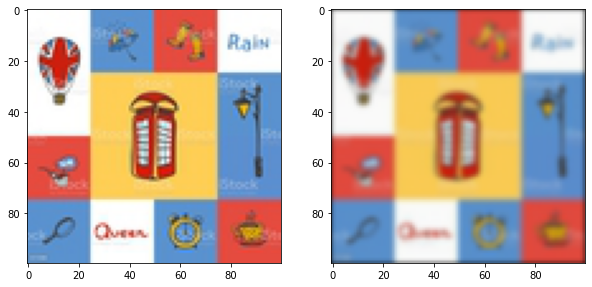

In [5]:
im = Image.open('images/task_13/1.jpg')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(blur_np(np.array(im), kernel))

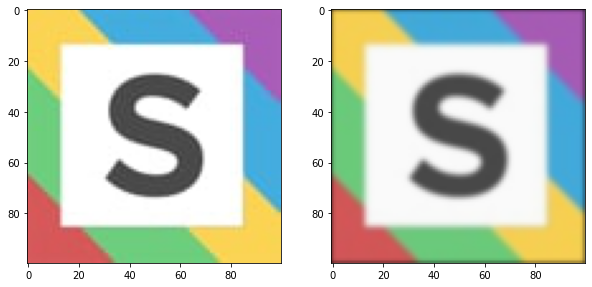

In [6]:
im = Image.open('images/task_13/2.jpg')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(blur_np(np.array(im), kernel))

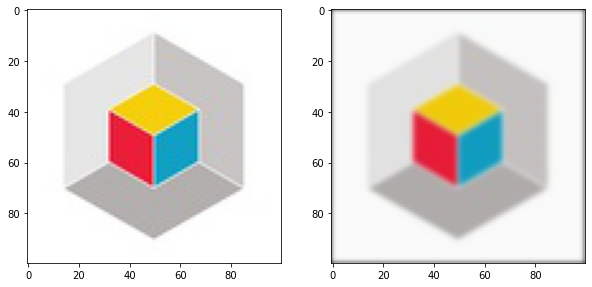

In [7]:
im = Image.open('images/task_13/3.jpg')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(blur_np(np.array(im), kernel))

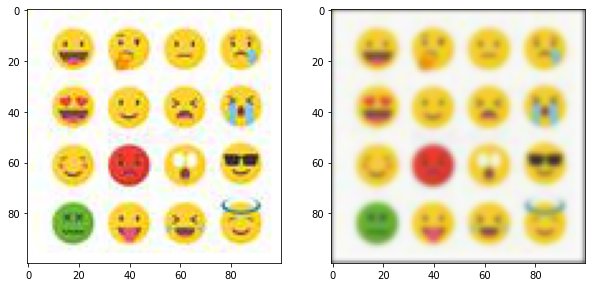

In [8]:
im = Image.open('images/task_13/4.jpg')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(blur_np(np.array(im), kernel))

## Speed test

In [8]:
test_im = np.random.randint(0, 256, (3000, 3000, 3))

In [9]:
time_np = %timeit -o -r 10 -n 10 blur_np(test_im, kernel)

806 ms ± 413 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [10]:
test_im_cp = cp.array(test_im)
kernel_cp = cp.array(kernel)
time_cp = %timeit -o -r 10 -n 10 blur_cp(test_im_cp, kernel_cp)

14.4 ms ± 5.08 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Difference (Numpy vs Cupy)

In [11]:
time_np.best / time_cp.best

63.568243734675775